In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Plot Style Sheet
from matplotlib import style
style.use('seaborn-white')

# Files to Load 
Traffic_Data_File = "Resources/Traffic_Violations_Clean_Rev1.csv"
color_popularity_File = "Resources/DuPont _Car_color_popularity.csv"

#Output file variables
output_Color_PNG = "output_data/Color.png"

#Read CSV files
Traffic_Data = pd.read_csv(Traffic_Data_File)
color_popularity= pd.read_csv(color_popularity_File)

Traffic_Data.head()

,Date Of Stop,Time Of Stop,SubAgency,Description,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,...,Make,Color,Violation Type,Charge,Contributed To Accident,Race,Gender,Driver State,DL State,Arrest Type
0,9/16/2012,12/30/1899 8:13:00 PM,"3rd district, Silver Spring","UNAUTHORIZED, INADEQUATE, OR INOPERATIVE LIGHT(S)",39.046945,-76.986339,No,No,No,No,...,MERCEDES BENZ,BLUE,Citation,11-393.9,No,BLACK,F,MD,MD,A - Marked Patrol
1,5/17/2012,12/30/1899 1:08:00 AM,"3rd district, Silver Spring","UNAUTHORIZED, INADEQUATE, OR INOPERATIVE LIGHT(S)",39.095240,-76.937225,No,No,No,No,...,BUICK,"BLUE, LIGHT",Citation,11-393.9,No,BLACK,F,MD,MD,A - Marked Patrol
2,5/15/2012,12/30/1899 11:06:00 PM,"3rd district, Silver Spring","UNAUTHORIZED, INADEQUATE, OR INOPERATIVE LIGHT(S)",38.993374,-76.992263,No,No,No,No,...,CHRYSLER,SILVER,Citation,11-393.9,No,BLACK,F,MD,MD,A - Marked Patrol
3,3/11/2012,12/30/1899 10:19:00 PM,"3rd district, Silver Spring","UNAUTHORIZED, INADEQUATE, OR INOPERATIVE LIGHT(S)",39.047348,-76.984754,No,No,No,No,...,CHEVROLET,WHITE,Citation,11-393.9,No,BLACK,F,MD,MD,A - Marked Patrol
4,8/7/2014,12/30/1899 10:47:00 PM,"5th district, Germantown","UNAUTHORIZED, INADEQUATE, OR INOPERATIVE LIGHT(S)",39.182760,-77.265902,No,No,No,No,...,MERCEDES BENZ,SILVER,Citation,11-393.9,No,BLACK,F,NC,NC,A - Marked Patrol


In [2]:
#Clean traffic data to fit with general population color data
color_popularity["Color"].replace(['White'], 'WHITE', inplace=True)
color_popularity["Color"].replace(['Silver'], 'SILVER', inplace=True)
color_popularity["Color"].replace(['Red'], 'RED', inplace=True)
color_popularity["Color"].replace(['Others'], 'OTHER', inplace=True)
color_popularity["Color"].replace(['Grey'], 'GRAY', inplace=True)
color_popularity["Color"].replace(['Green'], 'GREEN', inplace=True)
color_popularity["Color"].replace(['Brown'], 'BROWN', inplace=True)
color_popularity["Color"].replace(['Blue'], 'BLUE', inplace=True)
color_popularity["Color"].replace(['Black'], 'BLACK', inplace=True)


color_popularity

,Color,Population_Distribution
0,WHITE,24
1,SILVER,16
2,RED,10
3,OTHER,2
4,GRAY,15
5,GREEN,2
6,BROWN,5
7,BLUE,7
8,BLACK,19


In [3]:
#Create separate DF for Color analysis 
Traffic_Data_Color = Traffic_Data

#Consolidate Colors for analysis 
Traffic_Data_Color["Color"].replace(['BLUE, LIGHT', 'BLUE, DARK'], 'BLUE', inplace=True)
Traffic_Data_Color["Color"].replace(['GOLD', 'TAN', 'BRONZE','COPPER'], 'BROWN', inplace=True)
Traffic_Data_Color["Color"].replace(['GREEN, LGT', 'GREEN, DK'], 'GREEN', inplace=True)
Traffic_Data_Color["Color"].replace(['CREAM', 'BEIGE'], 'WHITE', inplace=True)
Traffic_Data_Color["Color"].replace(['MAROON'], 'RED', inplace=True)
Traffic_Data_Color["Color"].replace(['ORANGE', 'YELLOW', 'PURPLE', 'PINK', 'MULTICOLOR', 'CHROME', 'CAMOUFLAGE'], 'OTHER', inplace=True)

#Group by Color count 
Traffic_Data_Color_GB = Traffic_Data_Color.groupby(["Color"]).count()

Traffic_Data_Color_GB

,Date Of Stop,Time Of Stop,SubAgency,Description,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,...,Year,Make,Violation Type,Charge,Contributed To Accident,Race,Gender,Driver State,DL State,Arrest Type
Color,,,,,,,,,,,,,,,,,,,,,
BLACK,179085,179085,179081,179085,165293,165293,179085,179085,179085,179085,...,179085,179084,179085,179085,179085,179085,179085,179085,178964,179085
BLUE,97783,97783,97783,97783,90384,90384,97783,97783,97783,97783,...,97783,97782,97783,97783,97783,97783,97783,97783,97722,97783
BROWN,54613,54613,54608,54613,50460,50460,54613,54613,54613,54613,...,54613,54613,54613,54613,54613,54613,54613,54613,54576,54613
GRAY,98933,98933,98933,98933,91622,91622,98933,98933,98933,98933,...,98933,98933,98933,98933,98933,98933,98933,98933,98899,98933
GREEN,49919,49919,49919,49919,45901,45901,49919,49919,49919,49919,...,49919,49919,49919,49919,49919,49919,49919,49919,49857,49919
OTHER,8718,8718,8718,8718,7968,7968,8718,8718,8718,8718,...,8718,8718,8718,8718,8718,8718,8718,8718,8700,8718
RED,85940,85940,85940,85940,79244,79244,85940,85940,85940,85940,...,85940,85940,85940,85940,85940,85940,85940,85940,85855,85940
SILVER,168379,168379,168379,168379,155682,155682,168379,168379,168379,168379,...,168379,168378,168379,168379,168379,168379,168379,168378,168257,168379
WHITE,145954,145954,145954,145954,135085,135085,145954,145954,145954,145954,...,145954,145952,145954,145954,145954,145954,145954,145953,145830,145954


In [4]:
#Isolate Color count data 
Color_Data = pd.DataFrame(Traffic_Data_Color_GB['Charge'])
Color_Data['Car_Color'] = Color_Data.index
Color_Data

,Charge,Car_Color
Color,,
BLACK,179085,BLACK
BLUE,97783,BLUE
BROWN,54613,BROWN
GRAY,98933,GRAY
GREEN,49919,GREEN
OTHER,8718,OTHER
RED,85940,RED
SILVER,168379,SILVER
WHITE,145954,WHITE


In [5]:
#Calculate color percent of total pulled over
Color_Data['Percent_Cited'] = (Color_Data['Charge']/Color_Data['Charge'].sum())*100

#Add population distrubution data from color_popularity file
Color_Data_Popular = pd.merge(Color_Data, color_popularity, on="Color", how="left")
Color_Data_Popular

,Color,Charge,Car_Color,Percent_Cited,Population_Distribution
0,BLACK,179085,BLACK,20.137205,19
1,BLUE,97783,BLUE,10.995205,7
2,BROWN,54613,BROWN,6.140957,5
3,GRAY,98933,GRAY,11.124517,15
4,GREEN,49919,GREEN,5.613140,2
5,OTHER,8718,OTHER,0.980295,2
6,RED,85940,RED,9.663520,10
7,SILVER,168379,SILVER,18.933370,16
8,WHITE,145954,WHITE,16.411791,24


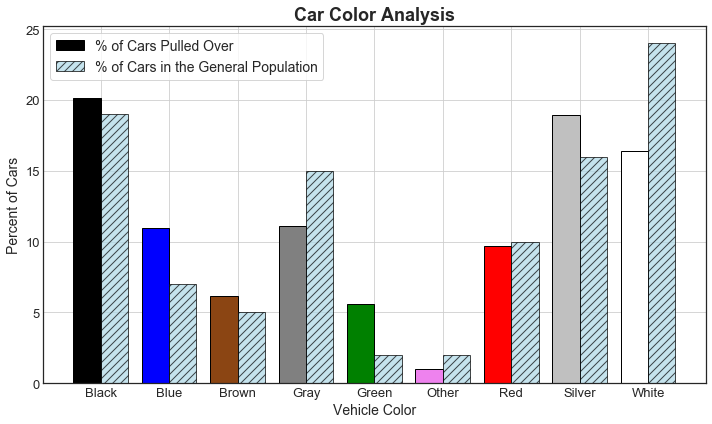

In [6]:
#Plot Data

#Assign variable for number of groups
n_groups = 9

#Assign 2 vairables for Y axis values
y_value = Color_Data["Percent_Cited"].tolist()
y_value_Compare = Color_Data_Popular["Population_Distribution"].tolist()

#Assign variable to color list 
Color_List1 = ['Black', 'Blue', 'saddlebrown', 'Gray', 'Green', 'violet', 'Red', 'Silver', 'White']

#Set sub plots
fig, ax = plt.subplots()

#Set index variable
index = np.arange(n_groups)

#Set bar width 
bar_width = 0.4

#create 2 different bar plots 
fig.set_size_inches(10,6)
rects1 = plt.bar(index, y_value, bar_width,
                 alpha= 1,
                 color= Color_List1,
                 edgecolor='black',
                 label='% of Cars Pulled Over')

rects2 = plt.bar(index + bar_width, y_value_Compare, bar_width,
                 alpha= .7,
                 color='lightblue',
                 edgecolor='black',
                 hatch = '///',
                 label='% of Cars in the General Population')

#Create Labels, Ledgend, and grid attributes 
plt.grid(True)
plt.xlabel('Vehicle Color', fontsize = 14)
plt.ylabel('Percent of Cars', fontsize = 14)
plt.title('Car Color Analysis', fontweight="bold", fontsize = 18)
plt.xticks(index + bar_width / 2, ('Black', 'Blue', 'Brown', 'Gray', 'Green', 'Other', 'Red', 'Silver', 'White'), fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(fontsize = 14, frameon=True)

#Show and export PNG of graph 
plt.tight_layout()
plt.savefig(output_Color_PNG, bbox_inches="tight")

plt.show()